Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/count/'

N = 1_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}1/counting_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}1/counting_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}1/counting_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}1/counting_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 08:51:19 2025 +0100) (509.74ms ela...,0.388,0.0313,0.640,2.45,0.16,11.29,52.07 C,Nominal
1,(Sat Mar 29 08:51:19 2025 +0100) (508.17ms ela...,1.400,0.0675,0.770,2.52,0.40,31.73,51.62 C,Nominal
2,(Sat Mar 29 08:51:20 2025 +0100) (508.92ms ela...,0.245,0.0350,0.678,1.21,0.17,11.83,51.62 C,Nominal
3,(Sat Mar 29 08:51:20 2025 +0100) (509.75ms ela...,0.232,0.0271,0.430,0.95,0.17,11.94,51.17 C,Nominal
4,(Sat Mar 29 08:51:21 2025 +0100) (508.79ms ela...,0.242,0.0214,0.427,0.95,0.17,11.99,51.17 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(47, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 08:51:30 2025 +0100) (57.93ms elap...,32.1,0.0169,1.090,33.42,3.41,94.86,49.57 C,Nominal
1,(Sat Mar 29 08:51:30 2025 +0100) (54.48ms elap...,26.1,0.0190,0.680,27.26,3.12,100.35,49.57 C,Nominal
2,(Sat Mar 29 08:51:30 2025 +0100) (55.11ms elap...,34.6,0.0155,0.841,35.48,3.88,99.69,49.57 C,Nominal
3,(Sat Mar 29 08:51:30 2025 +0100) (55.06ms elap...,33.6,0.0277,0.661,34.52,3.89,97.96,49.57 C,Nominal
4,(Sat Mar 29 08:51:30 2025 +0100) (54.74ms elap...,33.9,0.0513,0.555,34.81,3.80,96.21,49.57 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 08:49:58 2025 +0100) (510.98ms ela...,0.2160,0.0000,0.260,0.29,0.05,3.13,46.32 C,Nominal
1,(Sat Mar 29 08:49:58 2025 +0100) (508.06ms ela...,0.1790,0.0428,0.291,0.32,0.12,9.56,46.45 C,Nominal
2,(Sat Mar 29 08:49:59 2025 +0100) (508.39ms ela...,0.0612,0.0000,0.280,0.10,0.04,2.57,46.45 C,Nominal
3,(Sat Mar 29 08:49:59 2025 +0100) (508.41ms ela...,0.0652,0.0000,0.230,0.11,0.04,2.48,46.43 C,Nominal
4,(Sat Mar 29 08:50:00 2025 +0100) (508.89ms ela...,0.1110,0.0000,0.316,0.16,0.06,3.68,46.43 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(22, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 08:50:09 2025 +0100) (60.98ms elap...,14.2,0.038,0.663,15.30,1.51,96.19,48.15 C,Nominal
1,(Sat Mar 29 08:50:09 2025 +0100) (56.50ms elap...,14.6,0.000,0.275,14.90,1.56,95.73,48.15 C,Nominal
2,(Sat Mar 29 08:50:09 2025 +0100) (57.68ms elap...,15.6,0.451,1.240,17.04,1.66,94.01,48.15 C,Nominal
3,(Sat Mar 29 08:50:09 2025 +0100) (56.55ms elap...,14.0,0.000,0.612,14.73,1.57,96.72,48.15 C,Nominal
4,(Sat Mar 29 08:50:09 2025 +0100) (56.52ms elap...,14.3,0.208,0.513,15.15,1.52,95.67,48.15 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [10]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [11]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 08:51:19,0.388,0.0313,0.640,2.45,0.16,11.29,52.07,Nominal,509.74
1,2025-03-29 08:51:19,1.400,0.0675,0.770,2.52,0.40,31.73,51.62,Nominal,508.17
2,2025-03-29 08:51:20,0.245,0.0350,0.678,1.21,0.17,11.83,51.62,Nominal,508.92
3,2025-03-29 08:51:20,0.232,0.0271,0.430,0.95,0.17,11.94,51.17,Nominal,509.75
4,2025-03-29 08:51:21,0.242,0.0214,0.427,0.95,0.17,11.99,51.17,Nominal,508.79


In [12]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(47, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 08:51:30,32.1,0.0169,1.090,33.42,3.41,94.86,49.57,Nominal,57.93
1,2025-03-29 08:51:30,26.1,0.0190,0.680,27.26,3.12,100.35,49.57,Nominal,54.48
2,2025-03-29 08:51:30,34.6,0.0155,0.841,35.48,3.88,99.69,49.57,Nominal,55.11
3,2025-03-29 08:51:30,33.6,0.0277,0.661,34.52,3.89,97.96,49.57,Nominal,55.06
4,2025-03-29 08:51:30,33.9,0.0513,0.555,34.81,3.80,96.21,49.57,Nominal,54.74


In [13]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 08:49:58,0.2160,0.0000,0.260,0.29,0.05,3.13,46.32,Nominal,510.98
1,2025-03-29 08:49:58,0.1790,0.0428,0.291,0.32,0.12,9.56,46.45,Nominal,508.06
2,2025-03-29 08:49:59,0.0612,0.0000,0.280,0.10,0.04,2.57,46.45,Nominal,508.39
3,2025-03-29 08:49:59,0.0652,0.0000,0.230,0.11,0.04,2.48,46.43,Nominal,508.41
4,2025-03-29 08:50:00,0.1110,0.0000,0.316,0.16,0.06,3.68,46.43,Nominal,508.89


In [14]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(22, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 08:50:09,14.2,0.038,0.663,15.30,1.51,96.19,48.15,Nominal,60.98
1,2025-03-29 08:50:09,14.6,0.000,0.275,14.90,1.56,95.73,48.15,Nominal,56.50
2,2025-03-29 08:50:09,15.6,0.451,1.240,17.04,1.66,94.01,48.15,Nominal,57.68
3,2025-03-29 08:50:09,14.0,0.000,0.612,14.73,1.57,96.72,48.15,Nominal,56.55
4,2025-03-29 08:50:09,14.3,0.208,0.513,15.15,1.52,95.67,48.15,Nominal,56.52


Visualize the Data

In [15]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


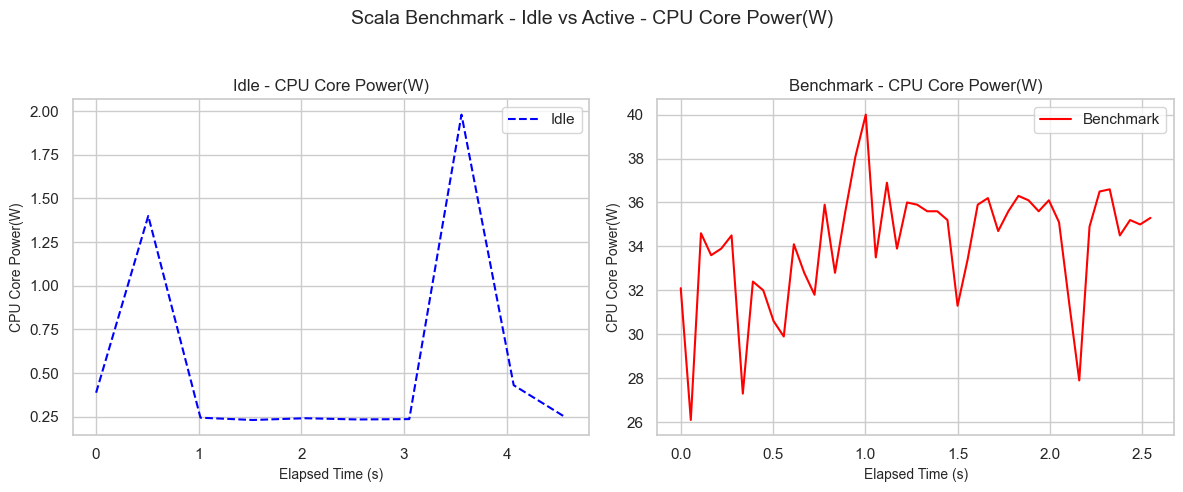

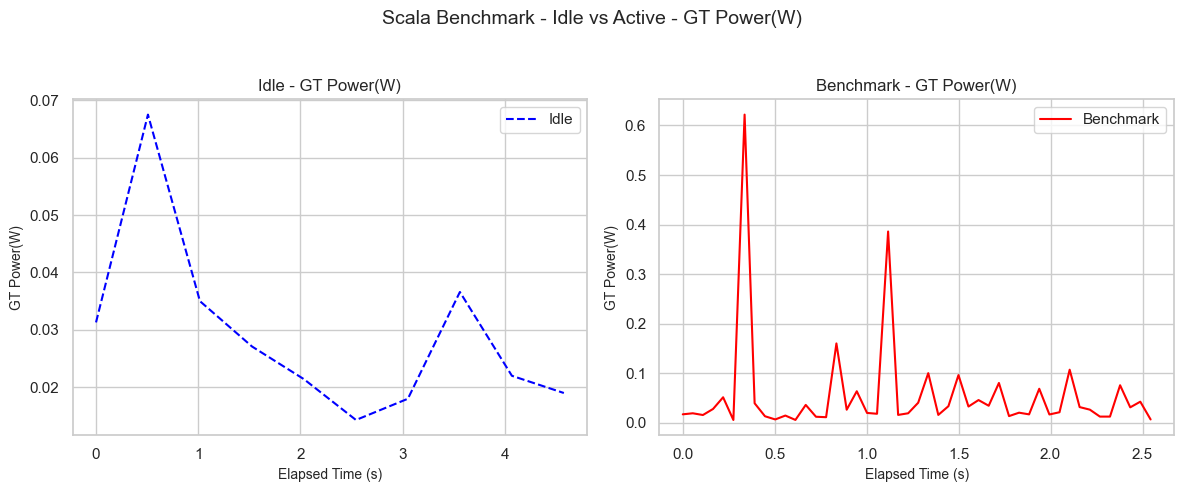

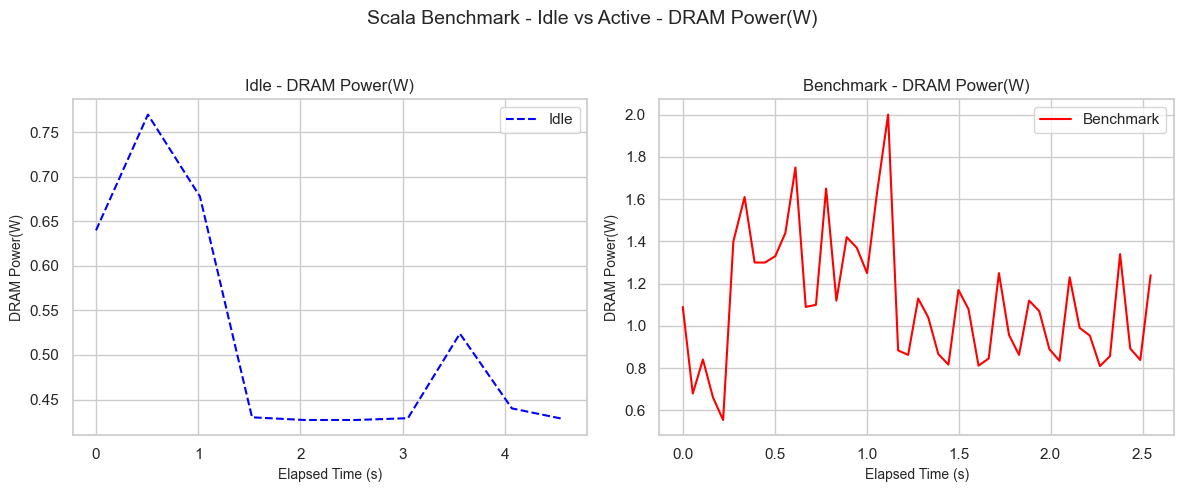

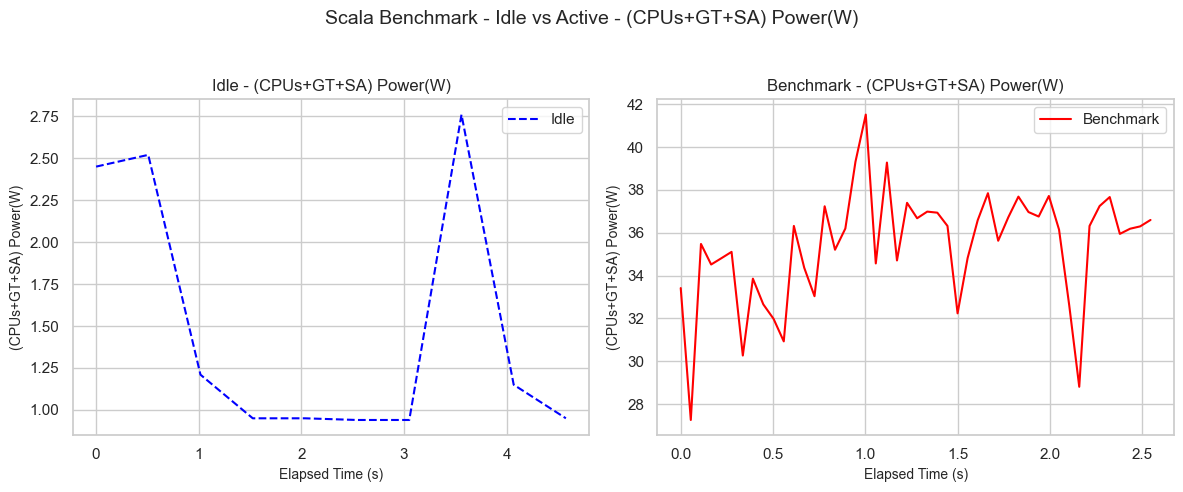

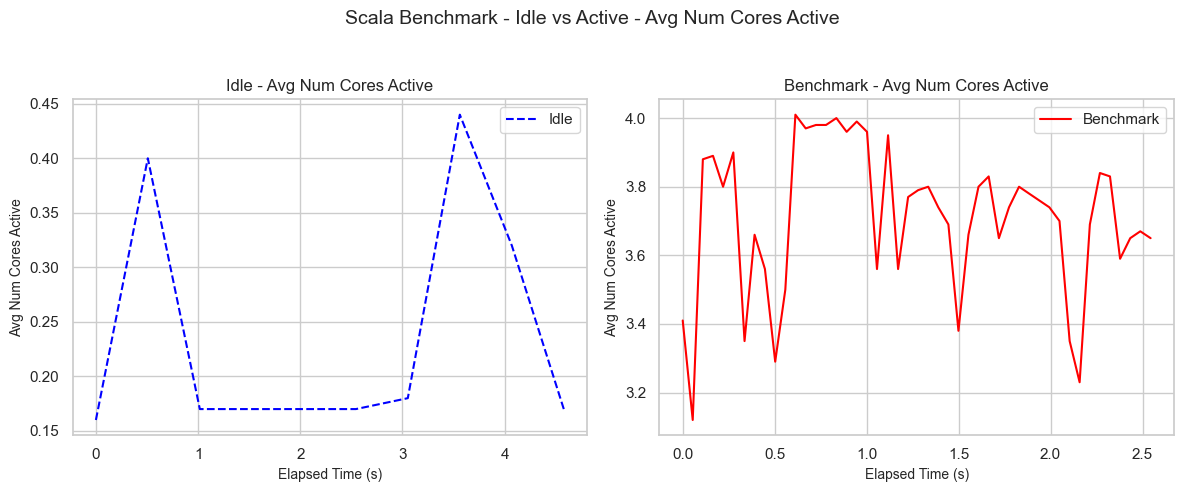

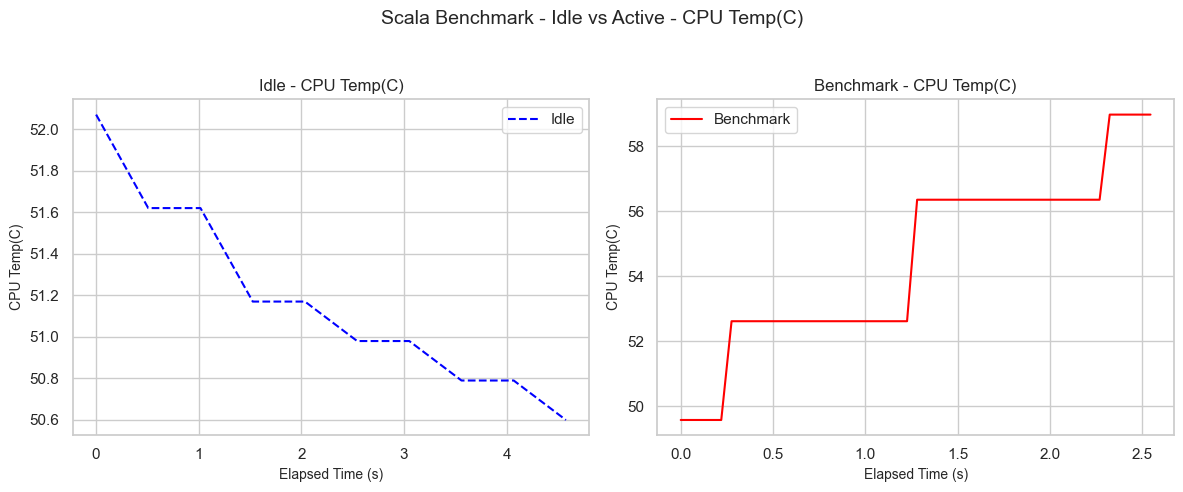

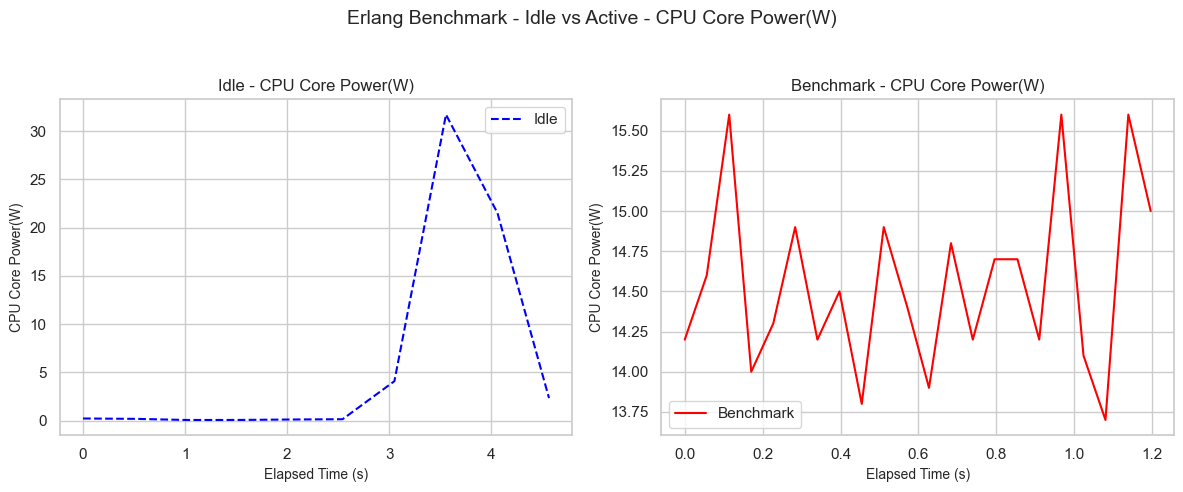

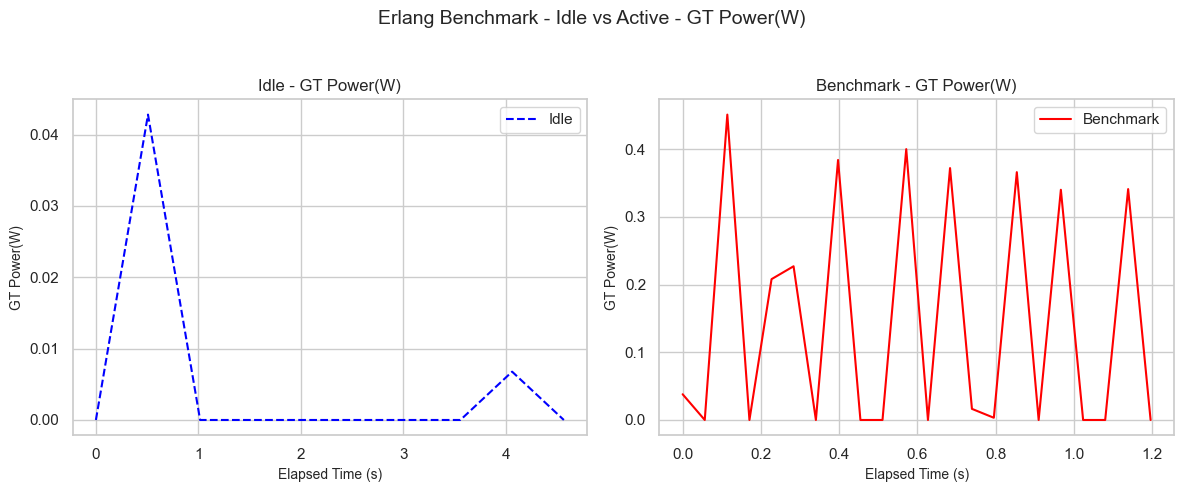

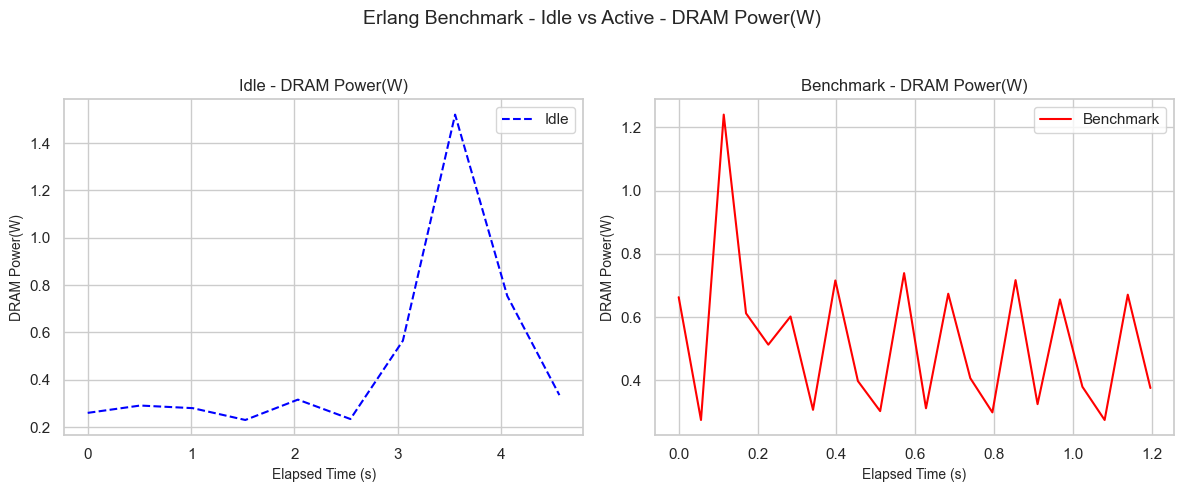

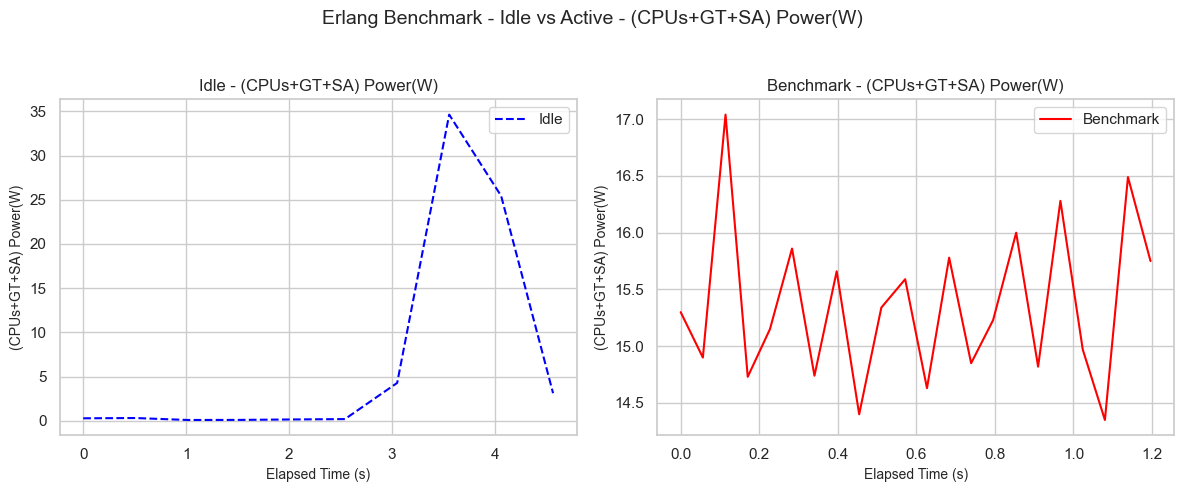

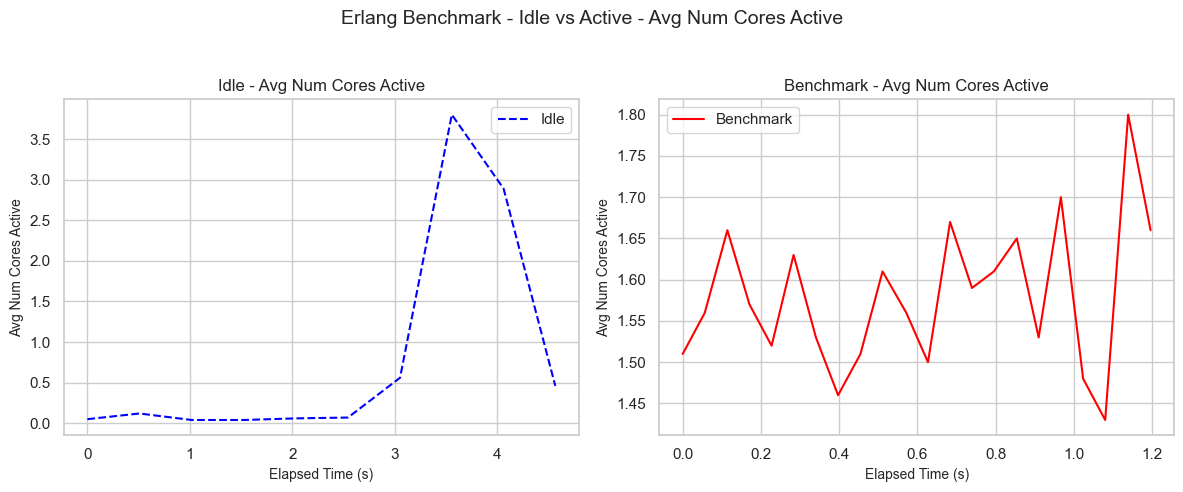

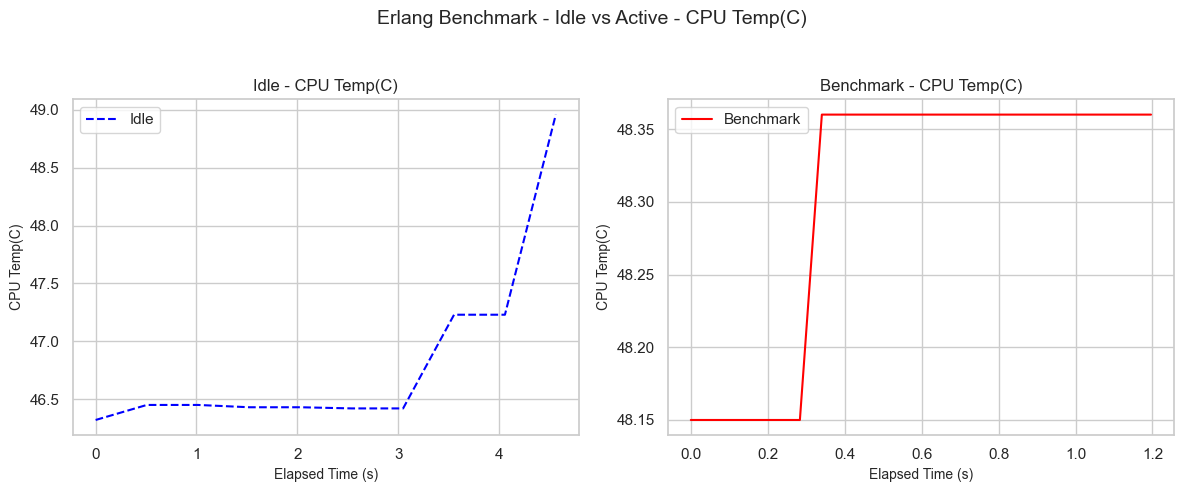

In [16]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [18]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [19]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
title_config_prefix = f"({n} Messages, {ITERATIONS} Iterations)"

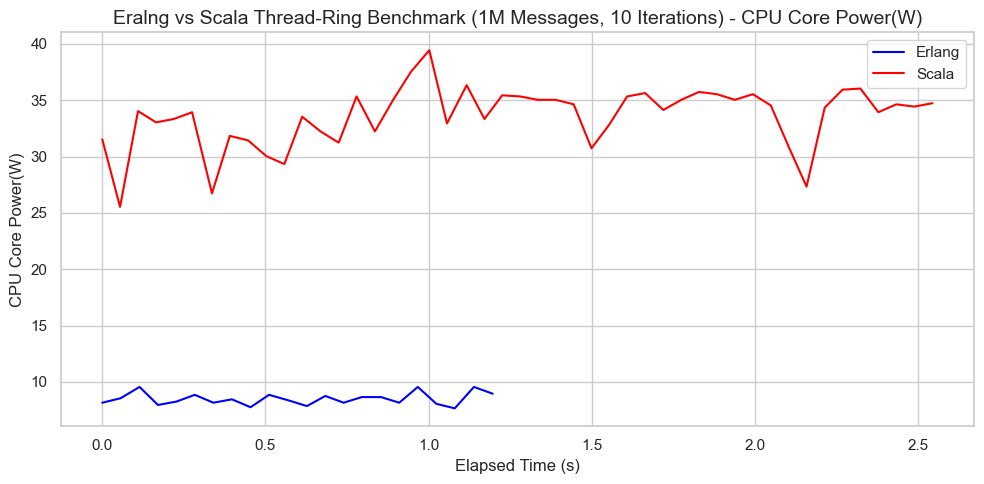

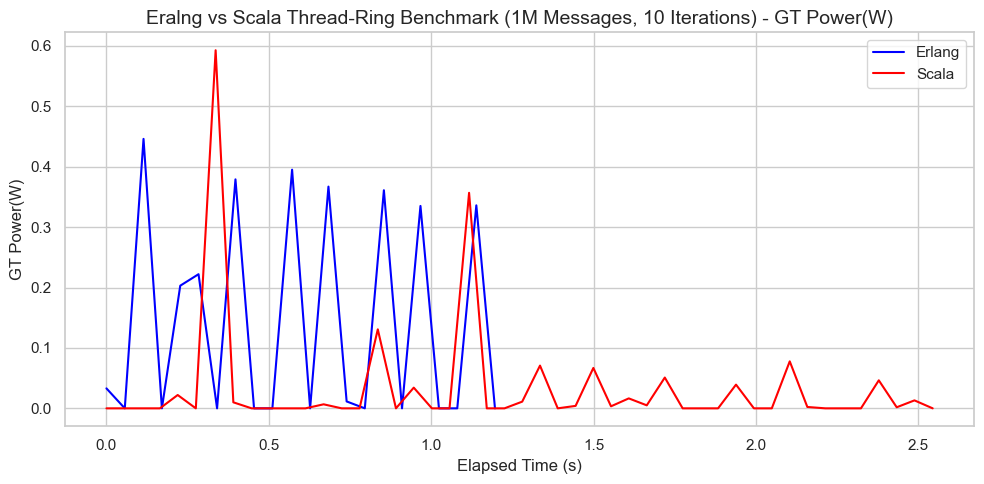

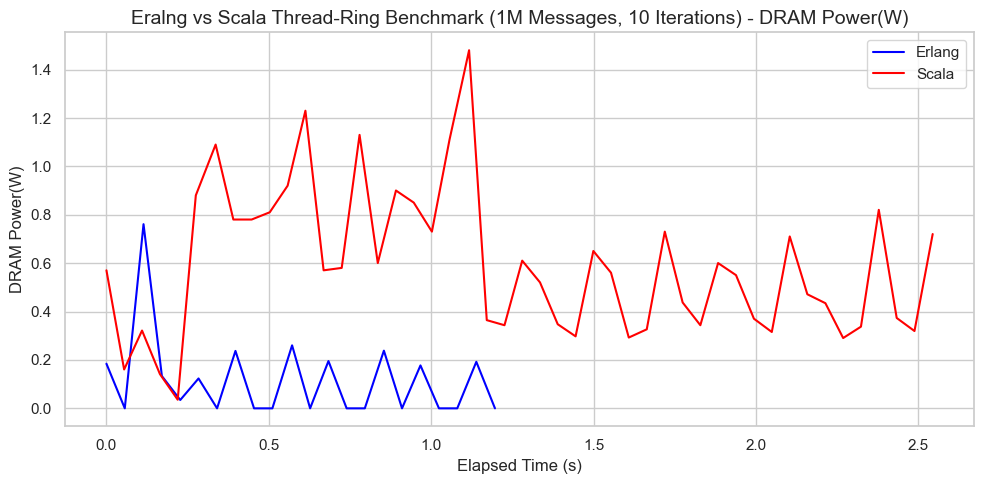

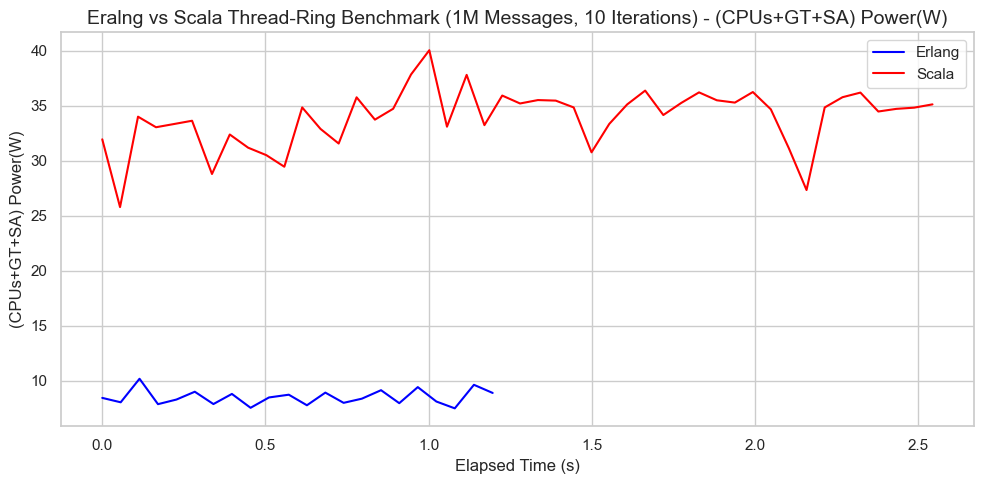

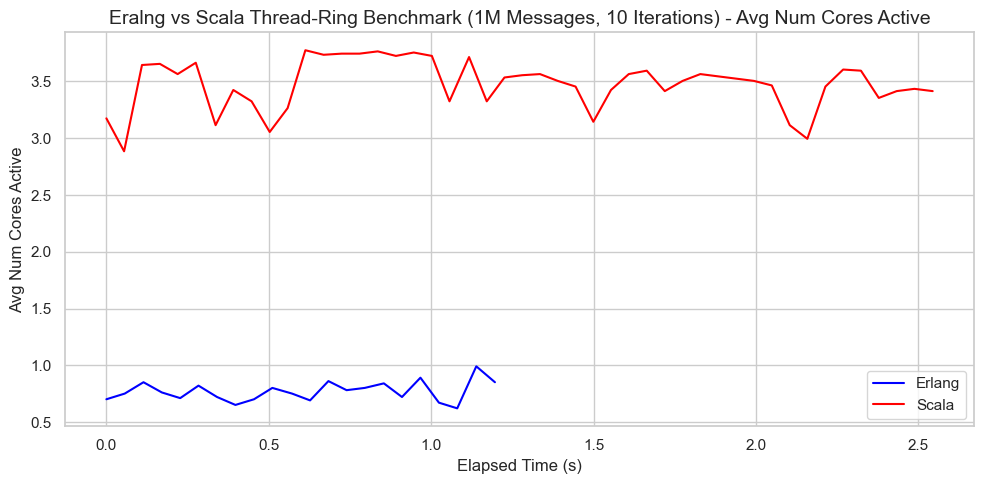

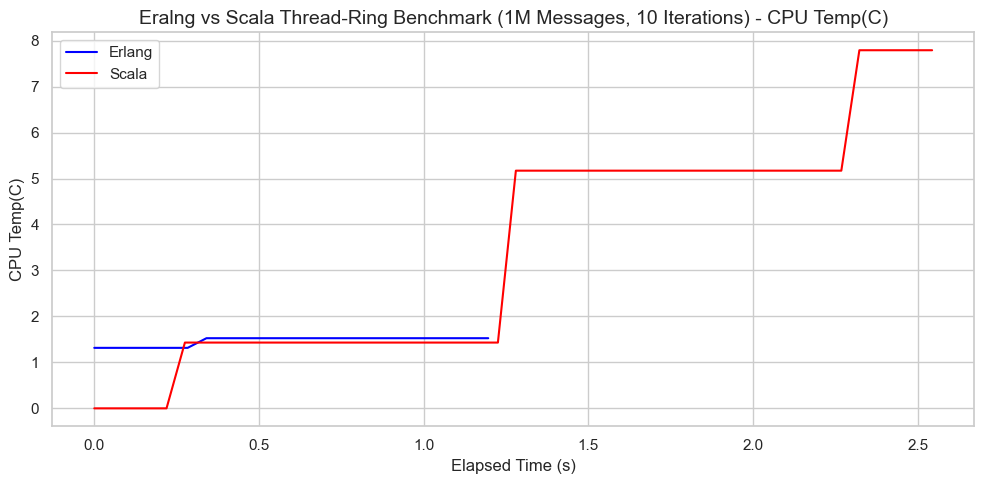

In [20]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [21]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [22]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        33.570443
GT Power(W)               0.025743
DRAM Power(W)             0.592083
(CPUs+GT+SA) Power(W)    33.906511
CPU Temp(C)               3.296106
Avg Num Cores Active      3.475851
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        8.502669
GT Power(W)              0.138073
DRAM Power(W)            0.042409
(CPUs+GT+SA) Power(W)    8.490273
CPU Temp(C)              1.468727
Avg Num Cores Active     0.770091
dtype: float64


Compute Total Energy Consumption

In [23]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


File created and results saved to ../../data/count/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 88.2142296625532 Joules
Erlang Benchmark: 10.673546359090915 Joules
